In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


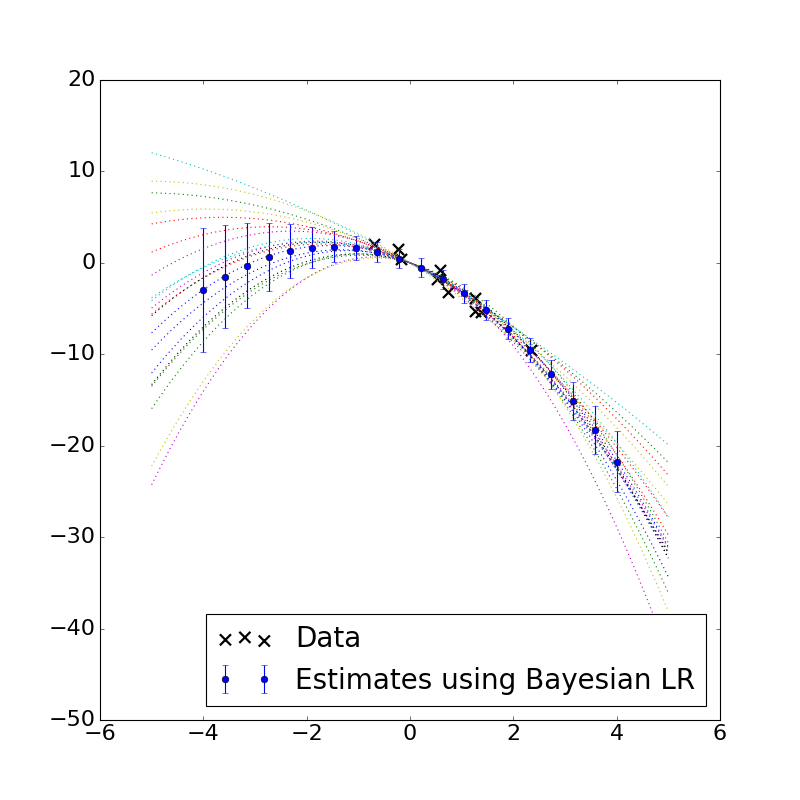

In [2]:
# Generate some data
np.random.seed(122344)
N = 10
d = 2
xsig = 1
sigma = 1
tau = 1
X = np.random.randn(N) * xsig
# We'll fit a degree 2 polynomial
X2 = np.c_[X, X**2]
w = np.random.randn(d) * tau
y = np.dot(X2, w) + np.random.randn(N) * sigma

# Calculate the posterior mean and variance
V_n = sigma**2 * np.linalg.inv((sigma**2/tau**2) * np.eye(d) + np.dot(X2.T, X2))
w_map = np.dot(V_n, np.dot(X2.T, y)) / sigma**2


# We'll fit some new points
X_new = np.linspace(-4, 4, 20)
X2_new = np.c_[X_new, X_new**2]
# Find the mean and variance using the full Bayesian approach
yhat_new = np.dot(X2_new, w_map)
sigma2_new = sigma**2 + np.diag(np.dot(X2_new, np.dot(V_n, X2_new.T)))
sigma_new = np.sqrt(sigma2_new)

# Plot some functions drawn from the posterior
ws = np.random.multivariate_normal(w_map, V_n, 20)
xx = np.linspace(-5, 5, 100)
XX2 = np.c_[xx, xx**2]
yy2 = np.dot(XX2, ws.T)
yy2.shape
yymap = np.dot(XX2, w_map)
plt.plot(xx, yy2, ls=':')

# Plot the actual data
plt.scatter(X, y, marker='x', s=100, color='k', label='Data', lw=2)

# Plot the estimates with error bars
plt.errorbar(X_new, yhat_new, yerr=sigma_new, ls='', marker='o', markersize=6, c='b', label='Estimates using Bayesian LR')
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='lower right', fontsize=25)
